# Succession of increasingly complex Keras examples

* Basic Iris classifier

MNIST
* Classifier w/ CNN
* Auto-encoder
* GAN

# Basic Classifier on Iris Dataset

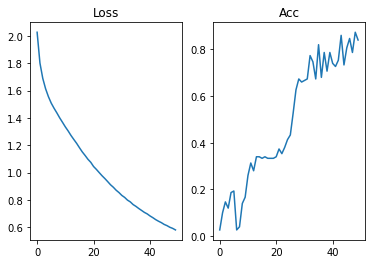

In [1]:
import sklearn.datasets
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# Get iris data.
ds = sklearn.datasets.load_iris()
X_train = ds['data']
Y_train = to_categorical(ds['target'])

model = Sequential([
  Dense(8, input_dim=4),
  Dense(3, activation='softmax')
])
model.compile(
loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, verbose=0)

plt.subplot(121);
plt.plot(history.history['loss']); plt.title('Loss')
plt.subplot(122);
plt.plot(history.history['accuracy']); plt.title('Acc')
plt.show()

# Convolutional Neural Nets

In [1]:
# Had to run this from shell: /Applications/Python\ 3.11/Install\ Certificates.command
# ala this website: https://stackoverflow.com/questions/49570464/error-importing-mnist-dataset-from-tensorflow-and-ssl-certificate-error-anaconda
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data(path='mnist.npz')

2026-02-06 18:53:33.167796: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-06 18:53:33.689037: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-06 18:53:33.691362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-06 18:53:35.293121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import \
Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

# Load and preprocess MNIST dataset
(train_ims, train_lbls), (test_ims, test_lbls) \
= mnist.load_data()

# Reshape and normalize images
train_images = train_ims.reshape((60000, 28, 28, 1)
      ).astype('float32') / 255
test_images = test_ims.reshape((10000, 28, 28, 1)
      ).astype('float32') / 255

# One-hot encode labels
train_labels = to_categorical(train_lbls)
test_labels = to_categorical(test_lbls)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3),
activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
  train_images, train_labels,
  epochs=5, batch_size=64, verbose=False)

# Evaluate the model
test_loss, test_acc = model.evaluate(
test_images, test_labels)
print('Test accuracy:', test_acc)

2026-02-06 18:53:53.222767: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step - loss: 0.0387 - accuracy: 0.9874
Test accuracy: 0.9873999953269958


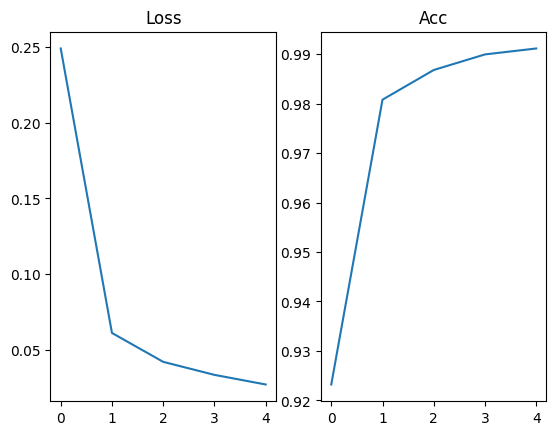

In [3]:
from matplotlib import pyplot as plt
h = history
plt.subplot(121);
plt.plot(h.history['loss']); plt.title('Loss')
plt.subplot(122);
plt.plot(h.history['accuracy']); plt.title('Acc')
plt.show()

# Auto-Encoders

In [4]:
import keras
from keras.layers import Reshape

N_DIM_ENCODED = 15
input_img = keras.Input(shape=(28,28,1))
encoder = Sequential([
    Flatten(),
    Dense(40),
    Dense(N_DIM_ENCODED)
])(input_img)
decoder = Sequential([
    Dense(40, input_dim=N_DIM_ENCODED),
    Dense(28*28),
    Reshape((28, 28, 1))
])(encoder)


encoder_model = keras.Model(input_img, encoder)

whole_model = keras.Model(input_img, decoder)
whole_model.compile(loss='mean_squared_error')

X_train = train_images
test_X = test_images
history = whole_model.fit(X_train,
    X_train, batch_size=100, epochs=30, verbose=0)

inp = test_X[:100].reshape((100,28,28,1))
encoded = encoder_model.predict(inp)
reconstructed = whole_model.predict(inp)

2026-02-06 18:57:10.985727: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2026-02-06 18:57:18.303086: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


4/4 [==============================] - 0s 2ms/step


In [9]:
h.history.keys()

dict_keys(['loss'])

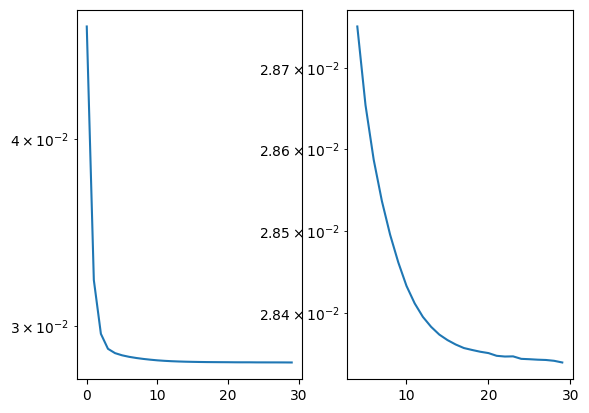

In [19]:
from matplotlib import pyplot as plt
import pandas as pd

h = history
plt.subplot(121);
pd.Series(h.history['loss']).plot(logy=True)
plt.subplot(122);
pd.Series(h.history['loss'])[4:].plot(logy=True)
#plt.plot(h.history['loss'], log='y'); plt.title('Loss')
#plt.subplot(122);
#plt.plot(h.history['loss'][2:]); plt.title('Acc')
plt.show()

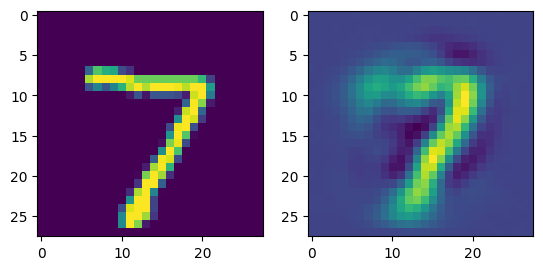

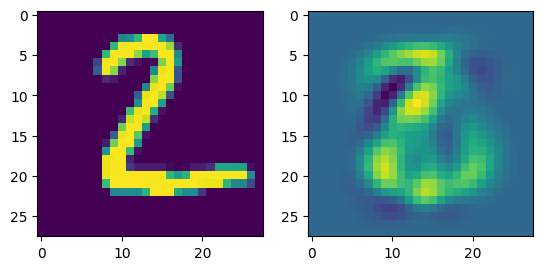

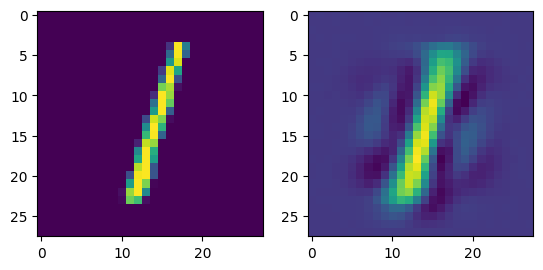

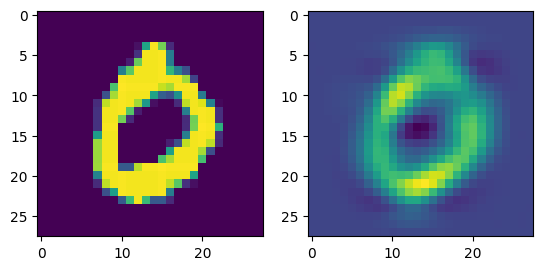

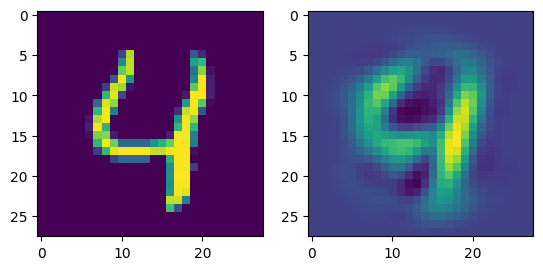

In [20]:
for i in range(5):
    plt.subplot(121)
    plt.imshow(test_X[i,:,:,:])
    plt.subplot(122)
    plt.imshow(reconstructed[i,:,:,:])
    plt.show()

# GANs

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [26]:
(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Normalize to [-1, 1]
x_train = x_train.astype("float32")
x_train = (x_train - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

BUFFER_SIZE = x_train.shape[0]
BATCH_SIZE = 128

dataset = tf.data.Dataset.from_tensor_slices(x_train)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [27]:
def build_generator():
    model = keras.Sequential([
        layers.Dense(256, input_shape=(100,)),
        layers.LeakyReLU(0.2),

        layers.Dense(512),
        layers.LeakyReLU(0.2),

        layers.Dense(1024),
        layers.LeakyReLU(0.2),

        layers.Dense(28 * 28 * 1, activation="tanh"),
        layers.Reshape((28, 28, 1))
    ])
    return model

def build_discriminator():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512),
        layers.LeakyReLU(0.2),

        layers.Dense(256),
        layers.LeakyReLU(0.2),

        layers.Dense(1, activation="sigmoid")
    ])
    return model



In [28]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

discriminator.trainable = False

gan_input = layers.Input(shape=(100,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = keras.Model(gan_input, gan_output)

gan.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss="binary_crossentropy"
)


In [30]:
EPOCHS = 30
noise_dim = 100

def show_samples(epoch):
    noise = tf.random.normal((16, noise_dim))
    generated_images = generator(noise, training=False)

    generated_images = (generated_images + 1) / 2.0

    plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap="gray")
        plt.axis("off")

    plt.suptitle(f"Epoch {epoch+1}")
    plt.show()


def train():
    for epoch in range(EPOCHS):
        for real_images in dataset:
            batch_size = real_images.shape[0]

            # ---------------------
            # Train discriminator
            # ---------------------
            noise = tf.random.normal((batch_size, noise_dim))
            fake_images = generator(noise)

            real_labels = tf.ones((batch_size, 1))
            fake_labels = tf.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

            # ---------------------
            # Train generator
            # ---------------------
            noise = tf.random.normal((batch_size, noise_dim))
            misleading_labels = tf.ones((batch_size, 1))

            g_loss = gan.train_on_batch(noise, misleading_labels)

        print(f"Epoch {epoch+1}/{EPOCHS} | D loss: {d_loss_real[0]:.4f} | G loss: {g_loss:.4f}")

        if (epoch + 1) % 5 == 0:
            show_samples(epoch)


Epoch 1/30 | D loss: 0.4969 | G loss: 0.9518
Epoch 2/30 | D loss: 0.4989 | G loss: 1.1690
Epoch 3/30 | D loss: 0.5246 | G loss: 1.2953
Epoch 4/30 | D loss: 0.4804 | G loss: 1.3666
Epoch 5/30 | D loss: 0.5422 | G loss: 1.2270


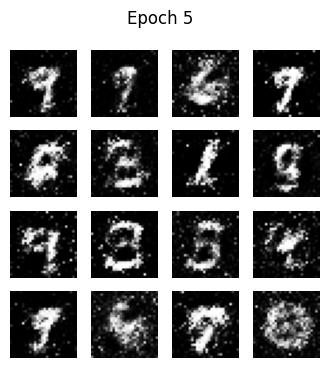

Epoch 6/30 | D loss: 0.5261 | G loss: 1.1113
Epoch 7/30 | D loss: 0.5860 | G loss: 1.0508
Epoch 8/30 | D loss: 0.5845 | G loss: 1.0024
Epoch 9/30 | D loss: 0.6699 | G loss: 0.9768
Epoch 10/30 | D loss: 0.6317 | G loss: 0.9252


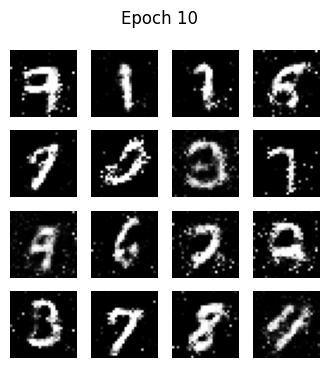

Epoch 11/30 | D loss: 0.6457 | G loss: 0.9707
Epoch 12/30 | D loss: 0.6146 | G loss: 0.9938
Epoch 13/30 | D loss: 0.5841 | G loss: 0.9948
Epoch 14/30 | D loss: 0.6635 | G loss: 1.0084
Epoch 15/30 | D loss: 0.6083 | G loss: 0.9900


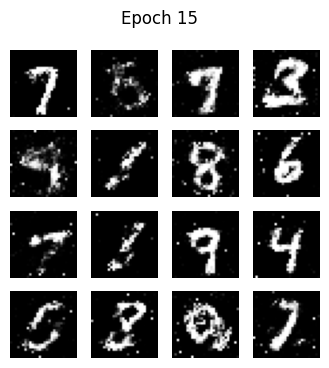

Epoch 16/30 | D loss: 0.6509 | G loss: 1.0390
Epoch 17/30 | D loss: 0.6066 | G loss: 0.9789
Epoch 18/30 | D loss: 0.6706 | G loss: 0.9173
Epoch 19/30 | D loss: 0.6126 | G loss: 1.0354
Epoch 20/30 | D loss: 0.6336 | G loss: 1.0009


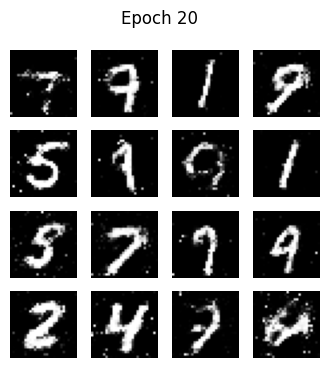

Epoch 21/30 | D loss: 0.6456 | G loss: 0.9480
Epoch 22/30 | D loss: 0.6089 | G loss: 0.9537
Epoch 23/30 | D loss: 0.6064 | G loss: 0.9070
Epoch 24/30 | D loss: 0.6191 | G loss: 0.9420
Epoch 25/30 | D loss: 0.6285 | G loss: 0.9686


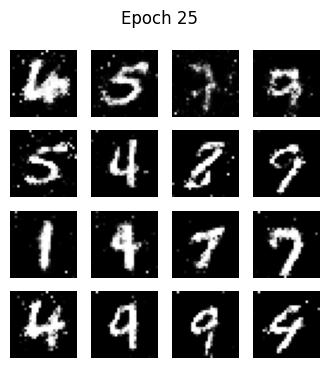

Epoch 26/30 | D loss: 0.6028 | G loss: 1.0283
Epoch 27/30 | D loss: 0.6267 | G loss: 1.0663
Epoch 28/30 | D loss: 0.6042 | G loss: 0.9495
Epoch 29/30 | D loss: 0.6025 | G loss: 0.9877
Epoch 30/30 | D loss: 0.5869 | G loss: 1.0122


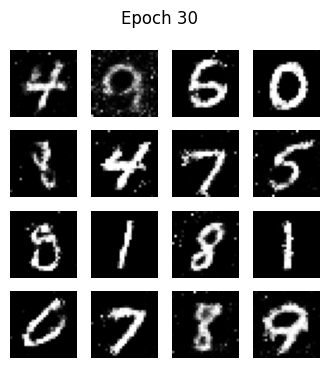

In [31]:
train()

# To Include
To include:
* CNN classifier
* GANs
* Diffusion Model

In [15]:
# Had to run this from shell: /Applications/Python\ 3.11/Install\ Certificates.command
# ala this website: https://stackoverflow.com/questions/49570464/error-importing-mnist-dataset-from-tensorflow-and-ssl-certificate-error-anaconda
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data(path='mnist.npz')

11490434/11490434 [==============================] - 1s 0us/step


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
750/750 [==============================] - 6s 8ms/step - loss: 0.3586 - accuracy: 0.8870 - val_loss: 0.0983 - val_accuracy: 0.9696
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.1164 - accuracy: 0.9672 - val_loss: 0.0570 - val_accuracy: 0.9842
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0861 - accuracy: 0.9757 - val_loss: 0.0515 - val_accuracy: 0.9849
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0655 - accuracy: 0.9815 - val_loss: 0.0406 - val_accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0411 - accuracy: 0.9870
Test accuracy: 0.9869999885559082


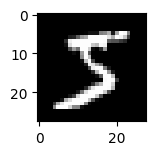

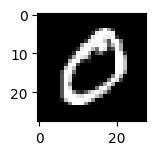

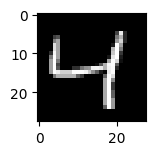

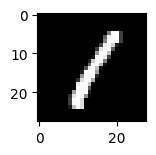

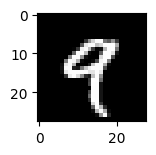

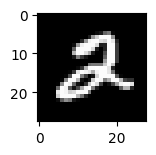

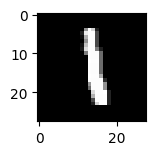

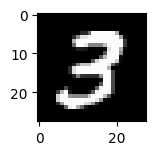

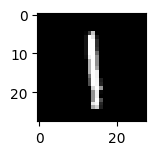

In [18]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

# GAN

Epoch 1
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 1, D Loss: 0.521595686674118, G Loss: 1.1885249614715576
Epoch 2
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 2, D Loss: 0.5285915732383728, G Loss: 1.132279872894287
Epoch 3
4/4 [==============================] - 0s 13ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 3, D Loss: 0.591363251209259, G Loss: 1.1425747871398926
Epoch 4
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 4, D Loss: 0.5977625548839569, G Loss: 1.187324047088623
Epoch 5
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 5, D Loss: 0.6171421110630035, G Loss: 1.1400306224822998
Epoch 6
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 6, D Loss: 0.5473015308380127, G Loss: 1.1807976961135864
Epoch 7
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 7, D Loss: 0.5021486431360245, G Loss: 1.0746378898620605
Epoch 8
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 8, D Loss: 0.5985024571418762, G Loss: 1.1448750495910645
Epoch 9
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step
Epoch 9, D Loss: 0.6065495610237122, G Loss: 1.2256699800491333
Epoch 10
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 10, D Loss: 0.5940441489219666, G Loss: 1.1770356893539429
1/1 [==============================] - 0s 22ms/step


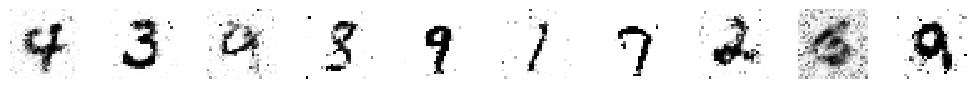

Epoch 11
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 11, D Loss: 0.5676028430461884, G Loss: 1.1266098022460938
Epoch 12
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 12, D Loss: 0.5905139446258545, G Loss: 1.2132487297058105
Epoch 13
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 13, D Loss: 0.5291492640972137, G Loss: 1.176025629043579
Epoch 14
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 14, D Loss: 0.5889118611812592, G Loss: 1.0813348293304443
Epoch 15
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 15, D Loss: 0.5413043200969696, G Loss: 1.1886541843414307
Epoch 16
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 16, D Loss: 0.520908385515213, G Loss: 1.2172715663909912
Epoch 17
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 17, D Loss: 0.5730651021003723, G Loss: 1.2313346862792969
Epoch 18
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 18, D Loss: 0.5655049383640289, G Loss: 1.245840072631836
Epoch 19
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 19, D Loss: 0.5234980583190918, G Loss: 1.2409659624099731
Epoch 20
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 20, D Loss: 0.47628314793109894, G Loss: 1.2153589725494385
1/1 [==============================] - 0s 6ms/step


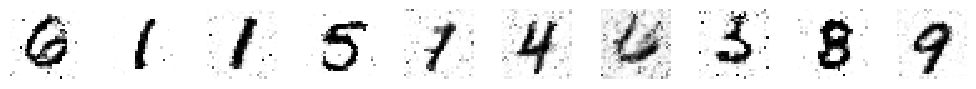

Epoch 21
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 21, D Loss: 0.5385964214801788, G Loss: 1.2456650733947754
Epoch 22
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 22, D Loss: 0.5417900085449219, G Loss: 1.2818031311035156
Epoch 23
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 23, D Loss: 0.4894740879535675, G Loss: 1.286312460899353
Epoch 24
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 24, D Loss: 0.4786945730447769, G Loss: 1.2616983652114868
Epoch 25
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 25, D Loss: 0.4730069637298584, G Loss: 1.4436018466949463
Epoch 26
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 26, D Loss: 0.5058846175670624, G Loss: 1.5171918869018555
Epoch 27
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 27, D Loss: 0.4505311846733093, G Loss: 1.4600205421447754
Epoch 28
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 28, D Loss: 0.5110177248716354, G Loss: 1.2986187934875488
Epoch 29
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 29, D Loss: 0.5673550069332123, G Loss: 1.3137767314910889
Epoch 30
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 30, D Loss: 0.5460885465145111, G Loss: 1.40389883518219
1/1 [==============================] - 0s 6ms/step


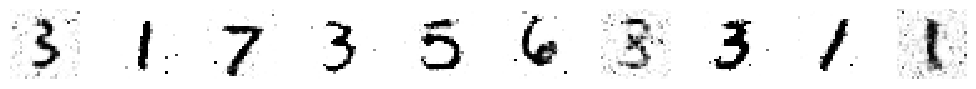

Epoch 31
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 31, D Loss: 0.5269040167331696, G Loss: 1.4475374221801758
Epoch 32
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 32, D Loss: 0.48931898176670074, G Loss: 1.40360426902771
Epoch 33
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 33, D Loss: 0.5278147161006927, G Loss: 1.3921685218811035
Epoch 34
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 34, D Loss: 0.45046935975551605, G Loss: 1.360342264175415
Epoch 35
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 35, D Loss: 0.45700646936893463, G Loss: 1.4276986122131348
Epoch 36
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 36, D Loss: 0.427051305770874, G Loss: 1.4328444004058838
Epoch 37
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 37, D Loss: 0.4116254895925522, G Loss: 1.496859073638916
Epoch 38
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 38, D Loss: 0.46591632068157196, G Loss: 1.4154448509216309
Epoch 39
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 39, D Loss: 0.5185348093509674, G Loss: 1.5045456886291504
Epoch 40
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 40, D Loss: 0.4601184278726578, G Loss: 1.570713758468628
1/1 [==============================] - 0s 7ms/step


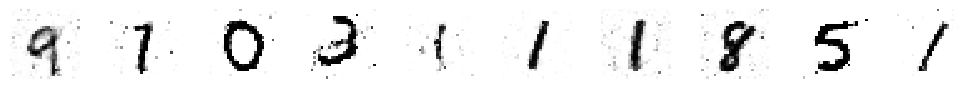

Epoch 41
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 41, D Loss: 0.49225562810897827, G Loss: 1.5968683958053589
Epoch 42
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 42, D Loss: 0.4478103667497635, G Loss: 1.5563088655471802
Epoch 43
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 43, D Loss: 0.409676730632782, G Loss: 1.4755767583847046
Epoch 44
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 44, D Loss: 0.4576190710067749, G Loss: 1.4696910381317139
Epoch 45
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 45, D Loss: 0.40412385761737823, G Loss: 1.5650018453598022
Epoch 46
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 46, D Loss: 0.420211523771286, G Loss: 1.5404331684112549
Epoch 47
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 47, D Loss: 0.4166615456342697, G Loss: 1.4213364124298096
Epoch 48
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 48, D Loss: 0.43047675490379333, G Loss: 1.6615049839019775
Epoch 49
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 49, D Loss: 0.4211213141679764, G Loss: 1.6248564720153809
Epoch 50
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 50, D Loss: 0.4862646609544754, G Loss: 1.5456867218017578
1/1 [==============================] - 0s 6ms/step


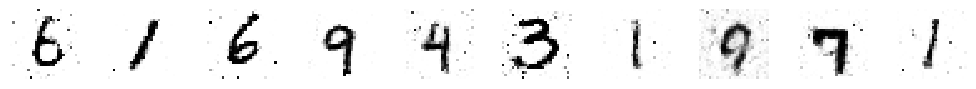

Epoch 51
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 51, D Loss: 0.42597779631614685, G Loss: 1.5362646579742432
Epoch 52
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 52, D Loss: 0.395298033952713, G Loss: 1.7009141445159912
Epoch 53
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 53, D Loss: 0.48526060581207275, G Loss: 1.461560606956482
Epoch 54
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 54, D Loss: 0.444507360458374, G Loss: 1.6149930953979492
Epoch 55
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 55, D Loss: 0.3868260085582733, G Loss: 1.5942180156707764
Epoch 56
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 56, D Loss: 0.3393840044736862, G Loss: 1.618490219116211
Epoch 57
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 57, D Loss: 0.3927825838327408, G Loss: 1.6325803995132446
Epoch 58
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 58, D Loss: 0.3959707170724869, G Loss: 1.939480185508728
Epoch 59
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 59, D Loss: 0.4180620163679123, G Loss: 1.7720378637313843
Epoch 60
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 60, D Loss: 0.41540801525115967, G Loss: 1.6914522647857666
1/1 [==============================] - 0s 7ms/step


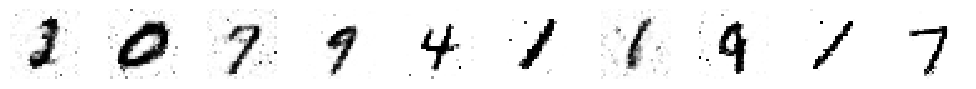

Epoch 61
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 61, D Loss: 0.421917125582695, G Loss: 1.7334649562835693
Epoch 62
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 62, D Loss: 0.49896909296512604, G Loss: 1.7374920845031738
Epoch 63
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 63, D Loss: 0.4094631224870682, G Loss: 1.8378322124481201
Epoch 64
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 64, D Loss: 0.29556433856487274, G Loss: 1.8167835474014282
Epoch 65
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step
Epoch 65, D Loss: 0.4155225455760956, G Loss: 1.7560832500457764
Epoch 66
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 66, D Loss: 0.36822497844696045, G Loss: 1.629575490951538
Epoch 67
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 67, D Loss: 0.37008894979953766, G Loss: 1.568494200706482
Epoch 68
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 68, D Loss: 0.38570183515548706, G Loss: 1.6773779392242432
Epoch 69
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 69, D Loss: 0.3683701902627945, G Loss: 1.7260942459106445
Epoch 70
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 70, D Loss: 0.3833847641944885, G Loss: 1.9300239086151123
1/1 [==============================] - 0s 7ms/step


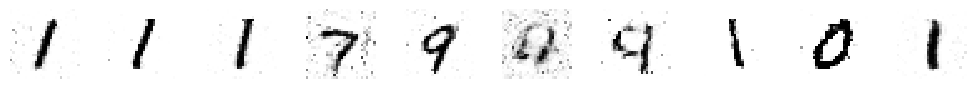

Epoch 71
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 71, D Loss: 0.3206309527158737, G Loss: 1.832431674003601
Epoch 72
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 72, D Loss: 0.33002376556396484, G Loss: 1.6442046165466309
Epoch 73
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 73, D Loss: 0.43096308410167694, G Loss: 1.8063759803771973
Epoch 74
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 74, D Loss: 0.4245237857103348, G Loss: 1.8978883028030396
Epoch 75
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 75, D Loss: 0.3718481659889221, G Loss: 1.8550407886505127
Epoch 76
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 76, D Loss: 0.35455863177776337, G Loss: 1.7326629161834717
Epoch 77
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 77, D Loss: 0.3530692756175995, G Loss: 1.8734924793243408
Epoch 78
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 78, D Loss: 0.33731116354465485, G Loss: 1.8194081783294678
Epoch 79
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 79, D Loss: 0.3323354572057724, G Loss: 1.7659188508987427
Epoch 80
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 80, D Loss: 0.3537566661834717, G Loss: 1.9805388450622559
1/1 [==============================] - 0s 6ms/step


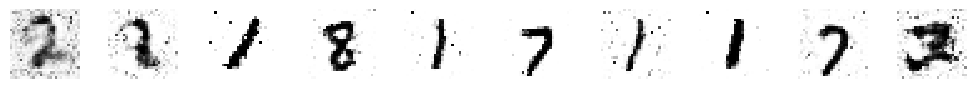

Epoch 81
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 81, D Loss: 0.3352147191762924, G Loss: 1.8938796520233154
Epoch 82
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 82, D Loss: 0.3852604925632477, G Loss: 1.9828532934188843
Epoch 83
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 83, D Loss: 0.3631030023097992, G Loss: 2.0005645751953125
Epoch 84
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 84, D Loss: 0.3924104571342468, G Loss: 2.0720982551574707
Epoch 85
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 85, D Loss: 0.24869103729724884, G Loss: 1.820319414138794
Epoch 86
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 86, D Loss: 0.2697930261492729, G Loss: 1.9110299348831177
Epoch 87
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 87, D Loss: 0.40080179274082184, G Loss: 2.027190685272217
Epoch 88
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 88, D Loss: 0.2896302044391632, G Loss: 1.9001655578613281
Epoch 89
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 89, D Loss: 0.2807794660329819, G Loss: 1.9133905172348022
Epoch 90
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 90, D Loss: 0.3353593349456787, G Loss: 2.0592896938323975
1/1 [==============================] - 0s 7ms/step


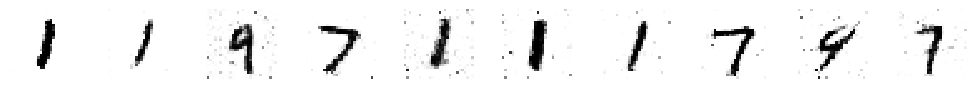

Epoch 91
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 91, D Loss: 0.4304211884737015, G Loss: 2.1750240325927734
Epoch 92
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 92, D Loss: 0.39824627339839935, G Loss: 1.9467601776123047
Epoch 93
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 93, D Loss: 0.32165856659412384, G Loss: 2.0523760318756104
Epoch 94
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 94, D Loss: 0.2966247648000717, G Loss: 2.0959720611572266
Epoch 95
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 95, D Loss: 0.31621135771274567, G Loss: 2.174609661102295
Epoch 96
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 96, D Loss: 0.3614579886198044, G Loss: 2.030606269836426
Epoch 97
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 97, D Loss: 0.308466374874115, G Loss: 1.905277967453003
Epoch 98
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 98, D Loss: 0.35802415013313293, G Loss: 2.123262882232666
Epoch 99
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 99, D Loss: 0.3016877919435501, G Loss: 1.9354312419891357
Epoch 100
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch 100, D Loss: 0.32190196216106415, G Loss: 1.8503539562225342
1/1 [==============================] - 0s 6ms/step


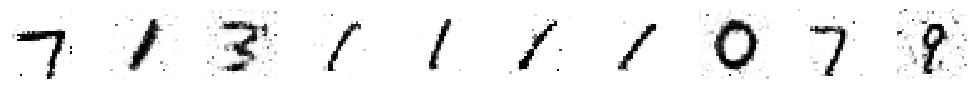

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam

'''
# Load MNIST dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0  # Normalize to the range [-1, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
'''

# Generator
generator = Sequential([
    Dense(256, input_dim=100, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(28 * 28 * 1, activation='tanh'),
    Reshape((28, 28, 1))
])

# Discriminator
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
discriminator.trainable = False

# GAN
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

def train_gan(epochs=1, batch_size=128):
    batch_count = X_train.shape[0] // batch_size
    
    for e in range(1, epochs+1):
        print(f"Epoch {e}")
        
        for _ in range(batch_count):
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            generated_images = generator.predict(noise)
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(image_batch, np.ones(batch_size))#, verbose=0)
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros(batch_size))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            discriminator.trainable = False
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            g_loss = gan.train_on_batch(noise, np.ones(batch_size))
        
        print(f"Epoch {e}, D Loss: {d_loss}, G Loss: {g_loss}")
        if e % 10 == 0:
            plot_generated_images(e, generator)

def plot_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.show()

# Train the GAN
train_gan(epochs=100, batch_size=128)

1/1 [==============================] - 0s 14ms/step


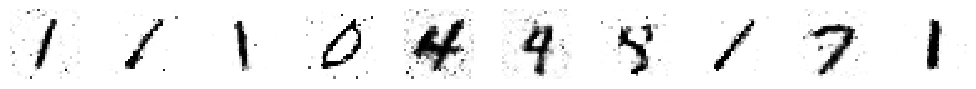

In [11]:
plot_generated_images(100, generator)

# Diffusion

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

# Hyperparameters
num_epochs = 100
batch_size = 64
learning_rate = 1e-3

# Load the MNIST dataset
(train_images, _), (_, _) = keras.datasets.mnist.load_data()
train_images = train_images.astype(np.float32) / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Define a custom diffusion model
def build_diffusion_model():
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
        layers.Flatten(),
        layers.Dense(28 * 28),
    ])
    return model

# Define the loss function (you may need a custom loss depending on your diffusion model)
def custom_loss(y_true, y_pred):
    # Reshape y_pred to match the shape of y_true (28x28x1)
    y_pred = tf.reshape(y_pred, [-1, 28, 28, 1])
    # Compute the mean squared error
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return mse

diffusion_model = build_diffusion_model()
diffusion_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=custom_loss)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for batch_start in tqdm(range(0, train_images.shape[0], batch_size), desc=f'Epoch {epoch+1}/{num_epochs}'):
        orig_images = train_images[batch_start:batch_start+batch_size]
        noise = np.random.randn(*orig_images.shape)
        noisy_images = orig_images + np.sqrt(0.1) * noise

        with tf.GradientTape() as tape:
            batch_output = diffusion_model(noisy_images)
            loss_value = custom_loss(orig_images, batch_output)
        total_loss += loss_value
        # Backpropagation and optimization
        grads = tape.gradient(loss_value, diffusion_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, diffusion_model.trainable_variables))

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / (train_images.shape[0] // batch_size):.4f}')

# Generate new images using the trained model
def generate_samples(num_samples=16):
    noise = np.random.randn(num_samples, 28, 28, 1)
    generated_images = diffusion_model.predict(noise)
    generated_images = np.clip(generated_images, 0, 1)
    return generated_images

# Save the generated images
generated_images = generate_samples()
keras.utils.save_img('generated_images.png', generated_images)

Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [17:21<00:00,  1.11s/it]


Epoch [1/100], Loss: 0.0110


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:18<00:00,  1.17s/it]


Epoch [2/100], Loss: 0.0059


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:20<00:00,  1.17s/it]


Epoch [3/100], Loss: 0.0056


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [4/100], Loss: 0.0054


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:22<00:00,  1.18s/it]


Epoch [5/100], Loss: 0.0053


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:20<00:00,  1.17s/it]


Epoch [6/100], Loss: 0.0052


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:15<00:00,  1.17s/it]


Epoch [7/100], Loss: 0.0051


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:15<00:00,  1.17s/it]


Epoch [8/100], Loss: 0.0051


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:15<00:00,  1.17s/it]


Epoch [9/100], Loss: 0.0050


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:16<00:00,  1.17s/it]


Epoch [10/100], Loss: 0.0050


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:16<00:00,  1.17s/it]


Epoch [11/100], Loss: 0.0050


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:17<00:00,  1.17s/it]


Epoch [12/100], Loss: 0.0049


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:18<00:00,  1.17s/it]


Epoch [13/100], Loss: 0.0049


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:16<00:00,  1.17s/it]


Epoch [14/100], Loss: 0.0049


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:17<00:00,  1.17s/it]


Epoch [15/100], Loss: 0.0049


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:17<00:00,  1.17s/it]


Epoch [16/100], Loss: 0.0048


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:17<00:00,  1.17s/it]


Epoch [17/100], Loss: 0.0048


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:17<00:00,  1.17s/it]


Epoch [18/100], Loss: 0.0048


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [19/100], Loss: 0.0048


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:16<00:00,  1.17s/it]


Epoch [20/100], Loss: 0.0048


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:15<00:00,  1.17s/it]


Epoch [21/100], Loss: 0.0048


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:15<00:00,  1.17s/it]


Epoch [22/100], Loss: 0.0048


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:18<00:00,  1.17s/it]


Epoch [23/100], Loss: 0.0048


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:17<00:00,  1.17s/it]


Epoch [24/100], Loss: 0.0047


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:16<00:00,  1.17s/it]


Epoch [25/100], Loss: 0.0047


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:06<00:00,  1.16s/it]


Epoch [26/100], Loss: 0.0047


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:04<00:00,  1.16s/it]


Epoch [27/100], Loss: 0.0047


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [28/100], Loss: 0.0047


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:11<00:00,  1.16s/it]


Epoch [29/100], Loss: 0.0047


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [30/100], Loss: 0.0047


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [31/100], Loss: 0.0047


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:13<00:00,  1.17s/it]


Epoch [32/100], Loss: 0.0047


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [33/100], Loss: 0.0047


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:19<00:00,  1.17s/it]


Epoch [34/100], Loss: 0.0047


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:11<00:00,  1.16s/it]


Epoch [35/100], Loss: 0.0047


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:08<00:00,  1.16s/it]


Epoch [36/100], Loss: 0.0047


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:09<00:00,  1.16s/it]


Epoch [37/100], Loss: 0.0047


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:15<00:00,  1.17s/it]


Epoch [38/100], Loss: 0.0047


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:12<00:00,  1.16s/it]


Epoch [39/100], Loss: 0.0047


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:14<00:00,  1.17s/it]


Epoch [40/100], Loss: 0.0047


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████████████████████████| 938/938 [18:13<00:00,  1.17s/it]


Epoch [41/100], Loss: 0.0047


Epoch 42/100:  93%|██████████████████████████████████████████████████████████████████████████████▏     | 873/938 [17:17<01:17,  1.19s/it]


KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
round 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
round 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
round 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
round 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
round 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
round 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
round 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
round 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
round 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
round 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
round 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
round 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
round 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
round 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
round 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
round 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
round 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
round 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
round 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
round 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
round 20
1/1 ━━━━━━━━━━━━━━━━━━━

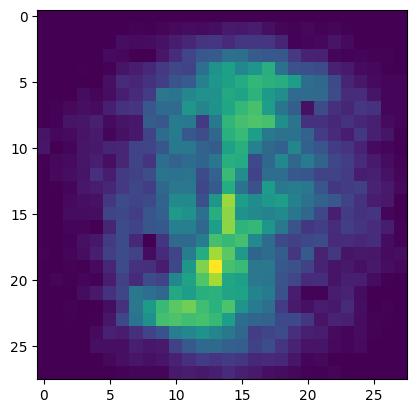

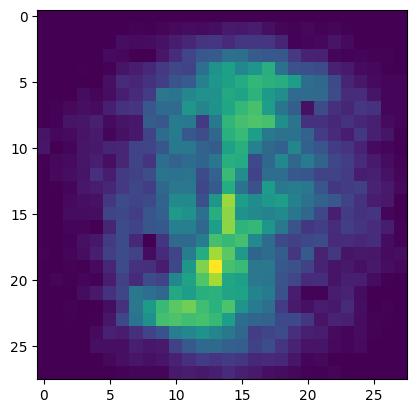

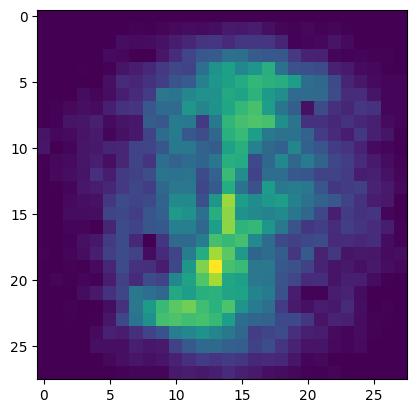

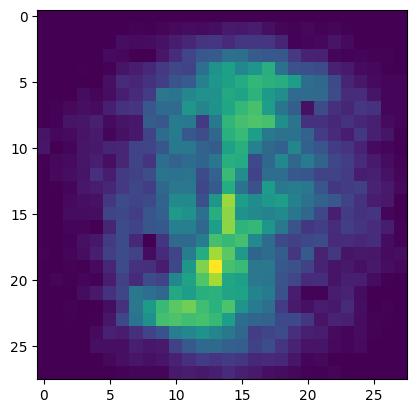

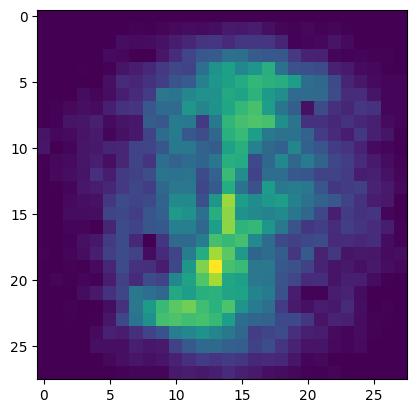

In [10]:
num_samples = 5
noise = np.random.randn(num_samples, 28, 28, 1)
generated_images = diffusion_model.predict(noise)
for i in range(50):
    print('round', i)
    generated_images = diffusion_model.predict(generated_images.reshape((num_samples, 28, 28, 1)))

generated_images = np.clip(generated_images, 0, 1)
#return generated_images

ims = generated_images.reshape((num_samples,28,28))
for i in range(num_samples):
    plt.imshow(ims[i,:,:])
    plt.show()